In [ ]:
# https://colab.research.google.com/drive/1856sFkKDZQ11Q9VvOBhIT5o2S8OGhNBd?usp=sharing

**BoW: metindeki kelimeleri sayısal ifadelere dönüştürür.**


Cümledeki her kelimeden kaçar adet olduğunu sayıyor yani frekansını.

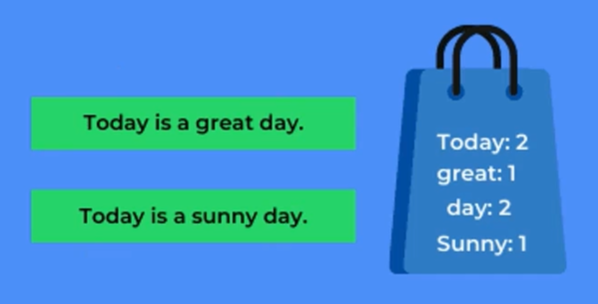

**BoW Yönteminin Işleyişi**

* Kelime Kümesi Oluşturma
* Kelime Frekansı Hesaplama
* Vektör Temsili (listeler-numpy array-bir boyutlu vektör)




In [ ]:
# count vectorizer içe aktar
'''
Metni kelimelere böler (tokenization).
Kelimeleri bir sözlük (vocabulary) haline getirir.
Her metindeki kelime frekanslarını sayarak bir bag-of-words (BoW) temsilini oluşturur.
'''
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
documents = ["Cat in the garden",
             "Cat in the car"]

In [ ]:
# CountVectorizer nesnesini oluştur
vectorizer = CountVectorizer()

In [ ]:
# Metinleri vektöre çevir (sayısal değerlere)
x = vectorizer.fit_transform(documents)

# kelime kümesi oluştur
features_names = vectorizer.get_feature_names_out()
print("features_names:" , features_names)

features_names: ['car' 'cat' 'garden' 'in' 'the']


In [ ]:
vector = x.toarray()
print(vector)

# ['car' 'cat' 'garden' 'in' 'the']

[[0 1 1 1 1]
 [1 1 0 1 1]]


# **IMDB Dataset bag of Words**

In [ ]:
import pandas as pd
import sklearn.feature_extraction.text as text
import re # metin temizleme
from collections import Counter # frekans hesaplama

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP/IMDB Dataset.csv")

In [ ]:
documents = df['review']
labels = df['sentiment'] # positive or negative

In [ ]:
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


**1️⃣Clean Text**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [72]:
def clean_text(text):

  # lowercase donusumu
  text = text.lower()

  # rakamları temizleme
  text = re.sub(r'\d+', '', text)

  # noktalama işaretlerini temizleme
  text = re.sub(r'[^\w\s]', '', text)

  # kısa kelimelerin temizlenmesi
  text = " ".join([word for word in text.split() if len(word) > 2])

  # stop words'leri çıkar
  stop_words = set(stopwords.words('english'))
  text = " ".join([word for word in text.split() if word.lower() not in stop_words])

  return text # temizlenmiş text'i return et

In [73]:
cleaned_doc = [clean_text(raw) for raw in documents]

In [74]:
cleaned_doc[0:5]

['one reviewers mentioned watching episode youll hooked right exactly happened mebr first thing struck brutality unflinching scenes violence set right word trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr called nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inmates turne

**2️⃣BoW**

In [75]:
# vectorizer tanımla
vectorizer = CountVectorizer()

In [76]:
# metin -> sayısal hale getir
x = vectorizer.fit_transform(cleaned_doc[:50])
print(x[:10].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
# kelime kümesini göster
features_names = vectorizer.get_feature_names_out()
print(f"features_names: {features_names[:20]}")

features_names: ['abetted' 'able' 'abraham' 'abrahams' 'absolutely' 'absorb' 'abstracted'
 'absurd' 'accented' 'accepted' 'accepting' 'accepts' 'accomplished'
 'accomplishes' 'according' 'account' 'accounts' 'accurate' 'accustomed'
 'achieve']


In [78]:
df_bow = pd.DataFrame(x.toarray(), columns=features_names)
df_bow.head()

,abetted,able,abraham,abrahams,absolutely,absorb,abstracted,absurd,accented,accepted,...,young,younger,youngs,youre,youve,zack,zellweger,zombie,zombiebr,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# kelime frekansını göster
word_counts = x.sum(axis=0).A1  # her sütunun toplamı alınıyor
word_counts_dict = dict(zip(features_names, word_counts))
word_counts_dict

# zip fonksiyonu: iki listeyi sırasıyla birleştirerek tuple çiftleri oluşturur
""".A1, NumPy’nin .toarray() fonksiyonunun tek boyutlu (1D) versiyonudur
ve sparse matrix'leri(kelime-frekans matrisi) düz bir NumPy dizisine çevirmek için kullanılır."""

".A1, NumPy’nin .toarray() fonksiyonunun tek boyutlu (1D) versiyonudur\nve sparse matrix'leri(kelime-frekans matrisi) düz bir NumPy dizisine çevirmek için kullanılır."

In [80]:
most_common_5_words = Counter(word_counts_dict).most_common(5)
print(most_common_5_words)

[('movie', 89), ('film', 62), ('one', 58), ('like', 43), ('even', 27)]


In [81]:
# Kelimeleri frekanslarına göre sıralayıp ilk 20'yi al
top_20_words = dict(sorted(word_counts_dict.items(), key=lambda item: item[1], reverse=True)[:20])
print(top_20_words)

# en sık geçen 20 kelimeyi df olarak yazdır
import pandas as pd
df_bow = pd.DataFrame(top_20_words.items(), columns=["Word", "Frequency"])
print(df_bow)

{'movie': 89, 'film': 62, 'one': 58, 'like': 43, 'even': 27, 'see': 23, 'story': 23, 'would': 23, 'much': 22, 'first': 20, 'good': 20, 'never': 19, 'time': 19, 'bad': 18, 'way': 18, 'could': 15, 'end': 15, 'people': 15, 'say': 15, 'also': 14}
      Word  Frequency
0    movie         89
1     film         62
2      one         58
3     like         43
4     even         27
5      see         23
6    story         23
7    would         23
8     much         22
9    first         20
10    good         20
11   never         19
12    time         19
13     bad         18
14     way         18
15   could         15
16     end         15
17  people         15
18     say         15
19    also         14
